<a href="https://colab.research.google.com/github/me-t1me/DIP_assignment_2/blob/master/DIP_2_Q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Apr 24 03:19:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall, Precision

from tensorflow.keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception

import matplotlib.pyplot as plt

In [4]:
img_size = 224

In [5]:
def show_history(model_history):
  loss = model_history.history['loss']
  val_loss = model_history.history['val_loss']

  plt.figure()
  plt.plot(model_history.epoch, loss, 'r', label='Training loss')
  plt.plot(model_history.epoch, val_loss, 'bo', label='Validation loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss Value')
  plt.ylim([0, 1])
  plt.legend()
  plt.show()

# Making dataset

In [6]:
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
# train_dir = "/content/drive/MyDrive/DIP_Q5/train"
# test_dir = "/content/drive/MyDrive/DIP_Q5/test"
# valid_dir = "/content/drive/MyDrive/DIP_Q5/validate"
train_dir = "/content/drive/MyDrive/DIP_Q5/train"
test_dir = "/content/drive/MyDrive/DIP_Q5/test"
valid_dir = "/content/drive/MyDrive/DIP_Q5/validate"


# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(valid_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

test_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 980 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Found 280 images belonging to 2 classes.


# VGG16

In [7]:
vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(img_size, img_size, 3))

58889256/58889256 [==============================] - 4s 0us/step


In [8]:
vgg16.trainable = False 

In [9]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
vgg16_model = Sequential()
vgg16_model.add(vgg16)
vgg16_model.add(Flatten())
vgg16_model.add(Dense(256, activation='relu'))
vgg16_model.add(Dropout(0.5))
vgg16_model.add(Dense(1, activation='sigmoid'))

In [11]:
vgg16_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21,137,729
Trainable params: 6,423,041
Non-trainable params: 14,714,688
_________________________________________________________________


In [12]:
vgg16_model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [13]:
vgg16_history = vgg16_model.fit(train_data,
                        epochs=5,
                        # steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        # validation_steps=len(valid_data)
                        )

Epoch 1/5
31/31 [==============================] - 379s 12s/step - loss: 0.1564 - accuracy: 0.9459 - val_loss: 0.0315 - val_accuracy: 1.0000
Epoch 2/5
31/31 [==============================] - 12s 389ms/step - loss: 0.0226 - accuracy: 0.9959 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 3/5
31/31 [==============================] - 12s 381ms/step - loss: 0.0164 - accuracy: 0.9980 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 4/5
31/31 [==============================] - 12s 372ms/step - loss: 0.0109 - accuracy: 0.9980 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 5/5
31/31 [==============================] - 12s 369ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000


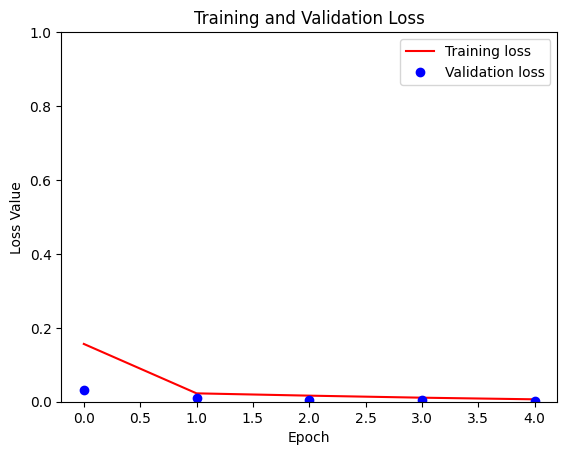

In [14]:
show_history(vgg16_history)

# VGG19 model

In [15]:
vgg19 = VGG19(include_top=False, weights='imagenet', input_shape=(img_size, img_size, 3))

vgg19.trainable = False

vgg19_model = Sequential()
vgg19_model.add(vgg19)
vgg19_model.add(Flatten())
vgg19_model.add(Dense(256, activation='relu'))
vgg19_model.add(Dropout(0.5))
vgg19_model.add(Dense(1, activation='sigmoid'))

80134624/80134624 [==============================] - 5s 0us/step


In [16]:
vgg19_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               6422784   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 26,447,425
Trainable params: 6,423,041
Non-trainable params: 20,024,384
_________________________________________________________________


In [17]:
vgg19_model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [18]:
vgg19_history = vgg19_model.fit(train_data,
                        epochs=5,
                        # steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        # validation_steps=len(valid_data)
                        )

Epoch 1/5
31/31 [==============================] - 14s 408ms/step - loss: 0.2218 - accuracy: 0.9041 - val_loss: 0.0233 - val_accuracy: 1.0000
Epoch 2/5
31/31 [==============================] - 12s 379ms/step - loss: 0.0413 - accuracy: 0.9908 - val_loss: 0.0137 - val_accuracy: 1.0000
Epoch 3/5
31/31 [==============================] - 13s 402ms/step - loss: 0.0193 - accuracy: 0.9969 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 4/5
31/31 [==============================] - 12s 397ms/step - loss: 0.0133 - accuracy: 0.9990 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 5/5
31/31 [==============================] - 12s 391ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000


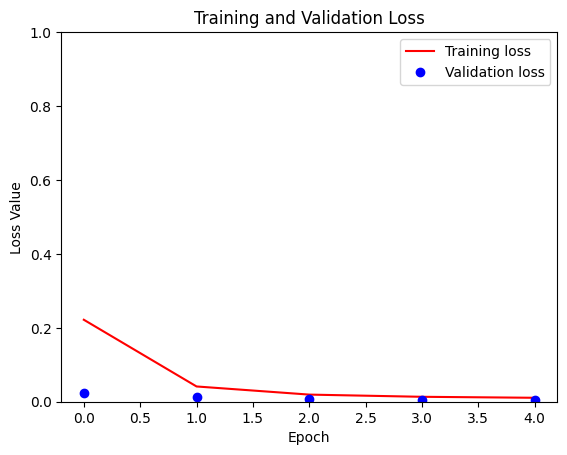

In [19]:
show_history(vgg19_history)

# resnet50

In [20]:
resnet50 = ResNet50(include_top=False, weights='imagenet', input_shape=(img_size, img_size, 3))
resnet50.trainable = False

resnet50_model = Sequential()
resnet50_model.add(resnet50)
resnet50_model.add(Flatten())
resnet50_model.add(Dense(256, activation='relu'))
resnet50_model.add(Dropout(0.5))
resnet50_model.add(Dense(1, activation='sigmoid'))

94765736/94765736 [==============================] - 5s 0us/step


In [21]:
resnet50_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_4 (Dense)             (None, 256)               25690368  
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 49,278,337
Trainable params: 25,690,625
Non-trainable params: 23,587,712
_________________________________________________________________


In [22]:
resnet50_model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [23]:
resnet50_history = resnet50_model.fit(train_data,
                        epochs=5,
                        # steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        # validation_steps=len(valid_data)
                        )

Epoch 1/5
31/31 [==============================] - 19s 457ms/step - loss: 0.8380 - accuracy: 0.5347 - val_loss: 0.6153 - val_accuracy: 0.6500
Epoch 2/5
31/31 [==============================] - 12s 389ms/step - loss: 0.6442 - accuracy: 0.6102 - val_loss: 0.5836 - val_accuracy: 0.8357
Epoch 3/5
31/31 [==============================] - 12s 379ms/step - loss: 0.5710 - accuracy: 0.7347 - val_loss: 0.5171 - val_accuracy: 0.9071
Epoch 4/5
31/31 [==============================] - 11s 353ms/step - loss: 0.5454 - accuracy: 0.7327 - val_loss: 0.4851 - val_accuracy: 0.9000
Epoch 5/5
31/31 [==============================] - 12s 384ms/step - loss: 0.4982 - accuracy: 0.8204 - val_loss: 0.4362 - val_accuracy: 0.9357


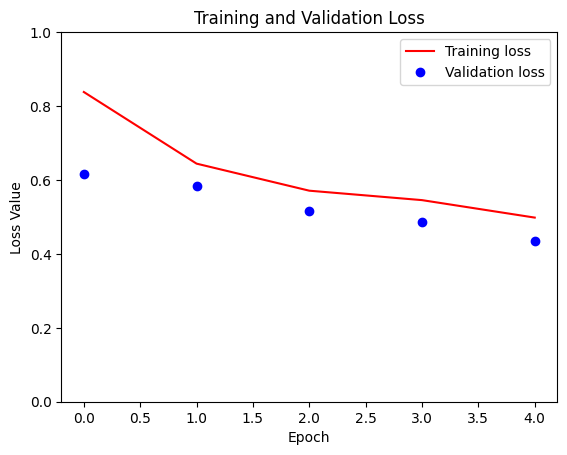

In [24]:
show_history(resnet50_history)

# InceptonNet

In [26]:
inceptonnet = InceptionV3(include_top=False, weights='imagenet', input_shape=(img_size, img_size, 3))
inceptonnet.trainable = False

inceptonnet_model = Sequential()
inceptonnet_model.add(inceptonnet)
inceptonnet_model.add(Flatten())
inceptonnet_model.add(Dense(256, activation='relu'))
inceptonnet_model.add(Dropout(0.5))
inceptonnet_model.add(Dense(1, activation='sigmoid'))

In [27]:
inceptonnet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_3 (Flatten)         (None, 51200)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               13107456  
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 34,910,497
Trainable params: 13,107,713
Non-trainable params: 21,802,784
_________________________________________________________________


In [28]:
inceptonnet_model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [29]:
inceptonnet_history = inceptonnet_model.fit(train_data,
                        epochs=5,
                        # steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        # validation_steps=len(valid_data)
                        )

Epoch 1/5
31/31 [==============================] - 25s 561ms/step - loss: 0.2994 - accuracy: 0.9173 - val_loss: 0.0357 - val_accuracy: 0.9929
Epoch 2/5
31/31 [==============================] - 12s 376ms/step - loss: 0.0584 - accuracy: 0.9806 - val_loss: 0.0246 - val_accuracy: 0.9857
Epoch 3/5
31/31 [==============================] - 11s 367ms/step - loss: 0.0254 - accuracy: 0.9908 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 4/5
31/31 [==============================] - 12s 381ms/step - loss: 0.0126 - accuracy: 0.9959 - val_loss: 0.0726 - val_accuracy: 0.9714
Epoch 5/5
31/31 [==============================] - 13s 405ms/step - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.0033 - val_accuracy: 1.0000


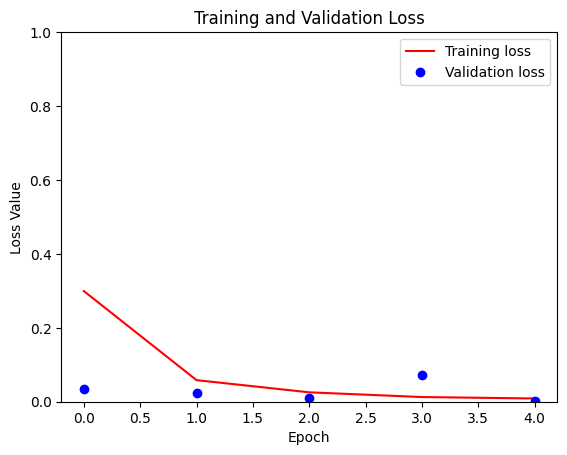

In [30]:
show_history(inceptonnet_history)

# XceptionNet

In [31]:
xception = Xception(include_top=False, weights='imagenet', input_shape=(img_size, img_size, 3))
xception.trainable = False

xception_model = Sequential()
xception_model.add(xception)
xception_model.add(Flatten())
xception_model.add(Dense(256, activation='relu'))
xception_model.add(Dropout(0.5))
xception_model.add(Dense(1, activation='sigmoid'))

83683744/83683744 [==============================] - 4s 0us/step


In [32]:
xception_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_4 (Flatten)         (None, 100352)            0         
                                                                 
 dense_8 (Dense)             (None, 256)               25690368  
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 46,552,105
Trainable params: 25,690,625
Non-trainable params: 20,861,480
_________________________________________________________________


In [33]:
xception_model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [34]:
xception_history = xception_model.fit(train_data,
                        epochs=5,
                        # steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        # validation_steps=len(valid_data)
                        )

Epoch 1/5
31/31 [==============================] - 21s 492ms/step - loss: 0.2803 - accuracy: 0.9235 - val_loss: 0.0726 - val_accuracy: 0.9786
Epoch 2/5
31/31 [==============================] - 12s 400ms/step - loss: 0.0373 - accuracy: 0.9857 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 3/5
31/31 [==============================] - 12s 390ms/step - loss: 0.0095 - accuracy: 0.9939 - val_loss: 8.2957e-04 - val_accuracy: 1.0000
Epoch 4/5
31/31 [==============================] - 12s 383ms/step - loss: 0.0063 - accuracy: 0.9969 - val_loss: 4.8510e-04 - val_accuracy: 1.0000
Epoch 5/5
31/31 [==============================] - 12s 384ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 4.5331e-04 - val_accuracy: 1.0000


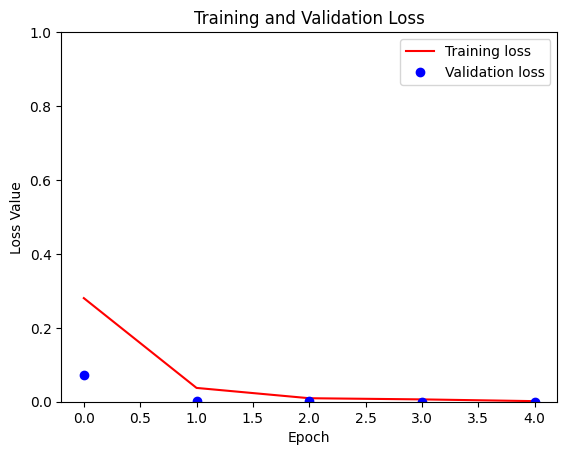

In [35]:
show_history(xception_history)

# Testing

In [58]:
import math
def accuracy_testing(model):
  correct = 0
  test_data.reset()
  y = model.predict(test_data,steps= math.ceil(test_data.samples // 32),workers=8)
  
  pred = []
  for i in y:
    pred.append(i[0])

  real = []
  total_images = test_data.n  
  steps = total_images // 32 
  for i in range(steps):
    a , b = test_data.next()
    real.extend(b)

  for i in range(len(pred)):
    a = int(pred[i] > 0.5)
    b = int(real[i])
    if a == b:
      correct += 1
    
  acc = correct / total_images
  return acc


In [59]:
print("accuracy of testing set for xceptionNet: ", accuracy_testing(xception_model))
print("accuracy of testing set for vgg16: ", accuracy_testing(vgg16_model)) 
print("accuracy of testing set for vgg19: ", accuracy_testing(vgg19_model)) 
print("accuracy of testing set for resnet50: ", accuracy_testing(resnet50_model)) 
print("accuracy of testing set for inceptonNet: ", accuracy_testing(inceptonnet_model)) 


8/8 [==============================] - 3s 147ms/step
accuracy of testing set for xceptionNet:  0.4607142857142857
8/8 [==============================] - 4s 146ms/step
accuracy of testing set for vgg16:  0.5035714285714286
8/8 [==============================] - 3s 163ms/step
accuracy of testing set for vgg19:  0.48928571428571427
8/8 [==============================] - 3s 117ms/step
accuracy of testing set for resnet50:  0.4857142857142857
8/8 [==============================] - 2s 77ms/step
accuracy of testing set for inceptonNet:  0.4642857142857143
